<a href="https://colab.research.google.com/github/feliciamargareta/Learning-EDA/blob/main/Learning_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 2. Data Cleaning & Imputation


## Addressing missing data
Exploring and analyzing data often means dealing with missing values, incorrect data types, and outliers. In this chapter, you’ll learn techniques to handle these issues and streamline your EDA processes!


### Dealing with missing data
It is important to deal with missing data before starting your analysis.

One approach is to drop missing values if they account for a small proportion, typically five percent, of your data.

Working with a dataset on plane ticket prices, stored as a pandas DataFrame called planes, you'll need to count the number of missing values across all columns, calculate five percent of all values, use this threshold to remove observations, and check how many missing values remain in the dataset.

In [93]:
import pandas as pd

# load the data
planes = pd.read_csv('planes.csv')

planes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10660 entries, 0 to 10659
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          10233 non-null  object 
 1   Date_of_Journey  10338 non-null  object 
 2   Source           10473 non-null  object 
 3   Destination      10313 non-null  object 
 4   Route            10404 non-null  object 
 5   Dep_Time         10400 non-null  object 
 6   Arrival_Time     10466 non-null  object 
 7   Duration         10446 non-null  object 
 8   Total_Stops      10448 non-null  object 
 9   Additional_Info  10071 non-null  object 
 10  Price            10044 non-null  float64
dtypes: float64(1), object(10)
memory usage: 916.2+ KB


In [46]:
# Count the number of missing values in each column
print(planes.isna().sum())

Airline            427
Date_of_Journey    322
Source             187
Destination        347
Route              256
Dep_Time           260
Arrival_Time       194
Duration           214
Total_Stops        212
Additional_Info    589
Price              616
dtype: int64


In [47]:
# Find the five percent threshold
threshold = len(planes) * 0.05
print(threshold)

533.0


We use the threshold 5% of total values which is 533 to drop the missing values.

In [48]:
# Create a filter
cols_to_drop = planes.columns[planes.isna().sum() <=threshold]

# Drop missing values for columns below the threshold
planes.dropna(subset=cols_to_drop, inplace = True)

print(planes.isna().sum())

Airline              0
Date_of_Journey      0
Source               0
Destination          0
Route                0
Dep_Time             0
Arrival_Time         0
Duration             0
Total_Stops          0
Additional_Info    300
Price              368
dtype: int64


By creating a missing values threshold and using it to filter columns, you've managed to remove missing values from all columns except for **"Additional_Info" and "Price"** because these 2 columns consist of >5% missing values.

### Strategies for remaining missing data
The five percent rule has worked nicely for your planes dataset, eliminating missing values from nine out of 11 columns!

Now, you need to decide what to do with the **"Additional_Info" and "Price"** columns, which are missing 300 and 368 values respectively.

You'll first take a look at what "Additional_Info" contains, then visualize the price of plane tickets by different airlines.

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt

In [50]:
# Check the values of the Additional_Info column
print(planes['Additional_Info'].value_counts())

No info                         6399
In-flight meal not included     1525
No check-in baggage included     258
1 Long layover                    14
Change airports                    7
No Info                            2
Business class                     1
Red-eye flight                     1
2 Long layover                     1
Name: Additional_Info, dtype: int64


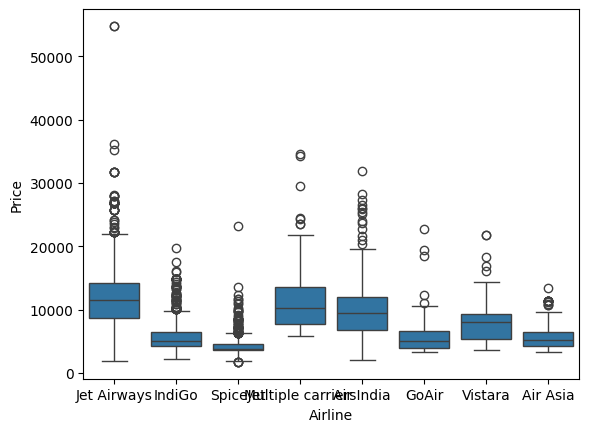

In [51]:
# Create a box plot of Price by Airline
sns.boxplot(data=planes, x='Airline', y='Price')

plt.show()

How to handle these missing values:
- Remove the "Additional_Info" column
- Impute the median by "Airline" for missing values of "Price".

### Imputing missing plane prices
Now there's just one column with missing values left!

You've removed the "Additional_Info" column from planes—the last step is to impute the missing data in the "Price" column of the dataset.


In [52]:
# Calculate median plane ticket prices by Airline
airline_prices = planes.groupby('Airline')['Price'].median()

print(airline_prices)

Airline
Air Asia              5192.0
Air India             9443.0
GoAir                 5003.5
IndiGo                5054.0
Jet Airways          11507.0
Multiple carriers    10197.0
SpiceJet              3873.0
Vistara               8028.0
Name: Price, dtype: float64


In [53]:
# Convert to a dictionary
prices_dict = airline_prices.to_dict()

In [54]:
# Map the dictionary to missing values of Price by Airline
planes["Price"] = planes['Price'].fillna(planes['Airline'].map(prices_dict))

# Check for missing values
print(planes.isna().sum())

Airline              0
Date_of_Journey      0
Source               0
Destination          0
Route                0
Dep_Time             0
Arrival_Time         0
Duration             0
Total_Stops          0
Additional_Info    300
Price                0
dtype: int64


You converted a grouped DataFrame to a dictionary and then used it to conditionally fill missing values for "Price" based on the "Airline"! Now let's explore how to perform exploratory analysis on categorical data.

## Converting and analyzing categorical data


### Finding the number of unique values
You would like to practice some of the categorical data manipulation and analysis skills that you've just seen. To help identify which data could be reformatted to extract value, you are going to find out which non-numeric columns in the planes dataset have a large number of unique values.

pandas has been imported for you as pd, and the dataset has been stored as planes.

In [55]:
# Filter dataframe for the object data type
non_numeric = planes.select_dtypes('object')

In [56]:
non_numeric

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info
2,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info
3,SpiceJet,24/06/2019,Kolkata,Banglore,CCU → BLR,09:00,11:25,2h 25m,non-stop,No info
4,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,18:55,10:25 13 Mar,15h 30m,1 stop,In-flight meal not included
...,...,...,...,...,...,...,...,...,...,...
10654,SpiceJet,21/05/2019,Banglore,Delhi,BLR → DEL,05:55,08:35,2h 40m,non-stop,No check-in baggage included
10655,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info
10656,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info
10658,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info


In [57]:
# Loop through the columns in the dataset.
for col in non_numeric.columns:
  # Add the column iterator to the print statement, then call the function to return the number of unique values in the column.
  print(f'The number of unique values in {col} column:', non_numeric[col].nunique())

The number of unique values in Airline column: 8
The number of unique values in Date_of_Journey column: 44
The number of unique values in Source column: 5
The number of unique values in Destination column: 6
The number of unique values in Route column: 122
The number of unique values in Dep_Time column: 218
The number of unique values in Arrival_Time column: 1220
The number of unique values in Duration column: 362
The number of unique values in Total_Stops column: 5
The number of unique values in Additional_Info column: 9


 Interestingly, "Duration" and "Arrival_Time" are currently an object column whereas it should be a numeric column, and has 362 unique values! Let's find out more about this column

### Flight duration categories
As you saw, there are 362 unique values in the "Duration" column of planes. Calling planes["Duration"].head(), we see the following values:

0        19h
1     5h 25m
2     4h 45m
3     2h 25m
4    15h 30m
Name: Duration, dtype: object
Looks like this won't be simple to convert to numbers. However, you could categorize flights by duration and examine the frequency of different flight lengths!

You'll create a "Duration_Category" column in the planes DataFrame. Before you can do this you'll need to create a list of the values you would like to insert into the DataFrame, followed by the existing values that these should be created from.

In [58]:
# Create short_flights, a string to capture values of "0h", "1h", "2h", "3h", or "4h" taking care to avoid values such as "10h".
# Create medium_flights to capture any values between five and nine hours.
# Create long_flights to capture any values from 10 hours to 16 hours inclusive.

# Create a list of categories
flight_categories = ["Short-haul", "Medium", "Long-haul"]

# Create short-haul values
short_flights = "^0h|^1h|^2h|^3h|^4h"

# Create medium-haul values
medium_flights = "^5h|^6h|^7h|^8h|^9h"

# Create long-haul values
long_flights = "10h|11h|12h|13h|14h|15h|16h"



###Adding duration categories
Now that you've set up the categories and values you want to capture, it's time to build a new column to analyze the frequency of flights by duration!

The variables flight_categories, short_flights, medium_flights, and long_flights that you previously created are available to you.

Additionally, the following packages have been imported: pandas as pd, numpy as np, seaborn as sns, and matplotlib.pyplot as plt.

- Create conditions, a list containing subsets of planes["Duration"] based on short_flights, medium_flights, and long_flights.
- Create the "Duration_Category" column by calling a function that accepts your conditions list and flight_categories, setting values not found to "Extreme duration".
- Create a plot showing the count of each category.



In [59]:
import numpy as np

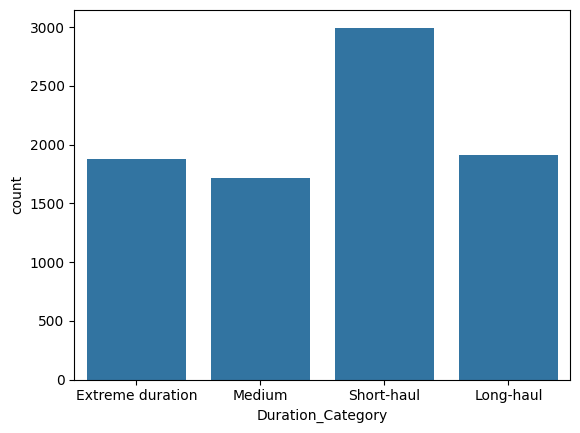

In [60]:
# Create conditions for values in flight_categories to be created
conditions = [
    (planes["Duration"].str.contains(short_flights)),
    (planes["Duration"].str.contains(medium_flights)),
    (planes["Duration"].str.contains(long_flights))
]

# Apply the conditions list to the flight_categories
planes["Duration_Category"] = np.select(conditions,
                                        flight_categories,
                                        default="Extreme duration")

# Plot the counts of each category
sns.countplot(data=planes, x="Duration_Category")
plt.show()


It's clear that the majority of flights are short-haul, and virtually none are longer than 16 hours! Now let's take a deep dive into working with numerical data.

## Working with Numerical data


###Flight duration
You would like to analyze the duration of flights, but unfortunately, the "Duration" column in the planes DataFrame currently contains string values.

You'll need to clean the column and convert it to the correct data type for analysis.

In [94]:
# Preview the column
print(planes["Duration"].head())

planes[['hour','minute']]=planes["Duration"].str.split(" ", expand = True)

0        19h
1     5h 25m
2     4h 45m
3     2h 25m
4    15h 30m
Name: Duration, dtype: object


In [95]:
planes.Duration.value_counts()

2h 50m     532
1h 30m     375
2h 55m     329
2h 45m     329
2h 35m     322
          ... 
27h 55m      1
31h 30m      1
35h 35m      1
42h 5m       1
47h 40m      1
Name: Duration, Length: 367, dtype: int64

In [96]:
# Remove the string character
planes["hour"] = planes["hour"].str.replace("h|m",'')

# Convert to float data type
planes["hour"] = planes["hour"].astype(float)



<ipython-input-96-a16ca7979708>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  planes["hour"] = planes["hour"].str.replace("h|m",'')


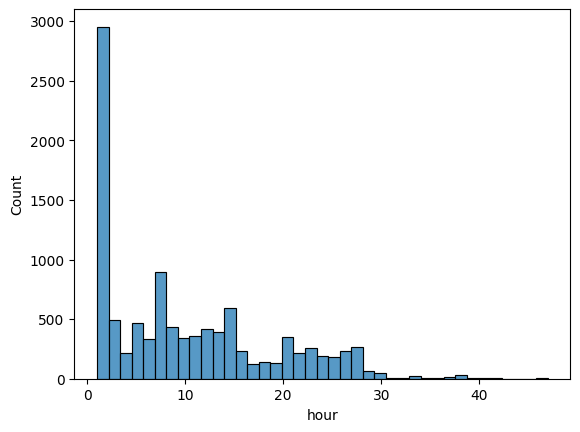

In [98]:
# Plot the duration
sns.histplot(data = planes, x = 'hour')
plt.show()

Once the data was in the right format, you were able to plot the distribution of 'Duration' and see that the most common flight length is around three hours.

### Adding descriptive statistics
Now "Duration" and "Price" both contain numeric values in the planes DataFrame, you would like to calculate summary statistics for them that are conditional on values in other columns.

In [105]:
# Mean Price by Destination
planes["price_destination_mean"] = planes.groupby("Destination")["Price"].transform(lambda x: x.mean())

In [106]:
print(planes[["Destination","price_destination_mean"]].value_counts())

Destination  price_destination_mean
Cochin       10506.993486              4391
Banglore     9132.225153               2773
Delhi        5157.794118               1219
New Delhi    11738.589499               888
Hyderabad    5025.210280                673
Kolkata      4801.489796                369
dtype: int64


In [109]:
# Calculate the median for "Duration" by "Airline", storing it as a column called "airline_median_duration".

planes['duration_by_airline'] = planes.groupby('Airline')['hour'].transform(lambda x: x.median())

In [111]:
print(planes[['Airline','duration_by_airline']].value_counts())

Airline            duration_by_airline
Jet Airways        13.0                   3685
IndiGo             2.0                    1981
Air India          15.0                   1686
Multiple carriers  10.0                   1148
SpiceJet           2.0                     787
Vistara            3.0                     455
Air Asia           2.0                     309
GoAir              5.0                     182
dtype: int64


In [112]:
# Mean Price by Destination
planes["price_destination_mean"] = planes.groupby("Destination")["Price"].transform(lambda x: x.mean())

print(planes[["Destination","price_destination_mean"]].value_counts())

Destination  price_destination_mean
Cochin       10506.993486              4391
Banglore     9132.225153               2773
Delhi        5157.794118               1219
New Delhi    11738.589499               888
Hyderabad    5025.210280                673
Kolkata      4801.489796                369
dtype: int64


## Handling Outliers

### Identifying outliers
You've proven that you recognize what to do when presented with outliers, but can you identify them using visualizations?

Try to figure out if there are outliers in the "Price" or "Duration" columns of the planes DataFrame.

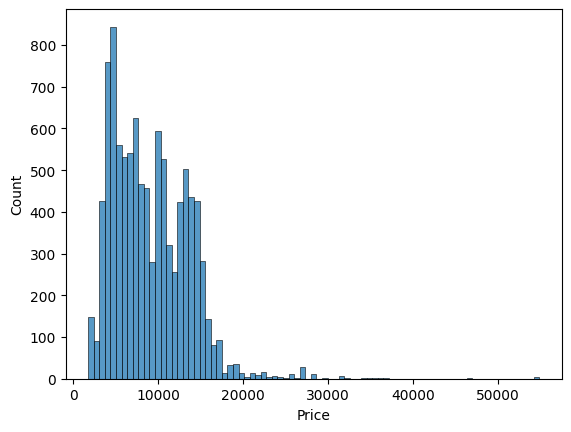

In [114]:
# Plot a histogram of flight prices
sns.histplot(data = planes, x='Price')
plt.show()

In [116]:
# Display descriptive statistics for flight duration
print(planes['hour'].describe())

count    10446.000000
mean        10.252345
std          8.502149
min          1.000000
25%          2.000000
50%          8.000000
75%         15.000000
max         47.000000
Name: hour, dtype: float64


Based on the chart above, "Price" and "Duration" columns are potentially contains outliers. The Price shows a right skewed distribution. while the max duration is almost 5x of the mean.

Histograms, boxplots, and descriptive statistics are also useful methods for identifying extreme values. Now let's deal with them!

### Removing outliers
While removing outliers isn't always the way to go, for your analysis, you've decided that you will only include flights where the "Price" is not an outlier.

Therefore, you need to find the upper threshold and then use it to remove values above this from the planes DataFrame.

In [118]:
# Find the 75th and 25th percentiles
price_seventy_fifth = planes["Price"].quantile(0.75)
price_twenty_fifth = planes["Price"].quantile(0.25)

# Calculate iqr
prices_iqr = price_seventy_fifth - price_twenty_fifth

# Calculate the thresholds
upper = price_seventy_fifth + (1.5 * prices_iqr)
lower = price_twenty_fifth - (1.5 * prices_iqr)

# Subset the data
planes = planes[(planes["Price"] > lower) & (planes["Price"] < upper)]

print(planes["Price"].describe())

count     9959.000000
mean      8875.160860
std       4057.202002
min       1759.000000
25%       5228.000000
50%       8283.000000
75%      12284.000000
max      23001.000000
Name: Price, dtype: float64


You managed to create thresholds based on the IQR and used them to filter the planes dataset to eliminate extreme prices. Originally the dataset had a maximum price of almost 55000, but the output of planes.describe() shows the maximum has been reduced to around 23000, reflecting a less skewed distribution for analysis!